In [6]:
import sys
import os

import pandas as pd
import geopandas as gpd
import h3pandas



In [7]:
shp = gpd.read_file("../resource/EMD_202101/TL_SCCO_EMD.shp", encoding='euc-kr')
gdf = shp.to_crs(4326)

print(gdf)

        EMD_CD          EMD_ENG_NM EMD_KOR_NM  \
0     42110101         Bongui-dong        봉의동   
1     42110102         Yoseon-dong        요선동   
2     42110103         Nagwon-dong        낙원동   
3     42110104  Jungangno 1(il)-ga      중앙로1가   
4     42110105   Jungangno 2(i)-ga      중앙로2가   
...        ...                 ...        ...   
5046  43800320         Gagok-myeon        가곡면   
5047  43800330     Yeongchun-myeon        영춘면   
5048  43800340   Eosangcheon-myeon       어상천면   
5049  43800350     Jeokseong-myeon        적성면   
5050  43800360      Danseong-myeon        단성면   

                                               geometry  
0     POLYGON ((127.73311 37.88673, 127.73298 37.885...  
1     POLYGON ((127.72584 37.88242, 127.72587 37.882...  
2     POLYGON ((127.72327 37.87704, 127.72249 37.876...  
3     POLYGON ((127.72991 37.88326, 127.72960 37.883...  
4     POLYGON ((127.72439 37.87755, 127.72430 37.877...  
...                                                 ...  
5046 

In [8]:
gdf_seoul = gdf.loc[gdf['EMD_CD'].between('11110000', '11740110')]
print(gdf_seoul)

        EMD_CD       EMD_ENG_NM EMD_KOR_NM  \
2888  11110101    Cheongun-dong        청운동   
2889  11110102      Singyo-dong        신교동   
2890  11110103   Gungjeong-dong        궁정동   
2891  11110104       Hyoja-dong        효자동   
2892  11110105  Changseong-dong        창성동   
...        ...              ...        ...   
3350  11740106     Dunchon-dong        둔촌동   
3351  11740107        Amsa-dong        암사동   
3352  11740108    Seongnae-dong        성내동   
3353  11740109     Cheonho-dong        천호동   
3354  11740110      Gangil-dong        강일동   

                                               geometry  
2888  POLYGON ((126.97556 37.58968, 126.97549 37.589...  
2889  POLYGON ((126.97031 37.58418, 126.97033 37.584...  
2890  POLYGON ((126.97400 37.58654, 126.97401 37.586...  
2891  POLYGON ((126.97356 37.58323, 126.97355 37.582...  
2892  POLYGON ((126.97353 37.58182, 126.97354 37.581...  
...                                                 ...  
3350  POLYGON ((127.15669 37.53756, 127.1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/h3pandas/h3pandas.py:749: UserWarning: 1 rows did not generate a H3 cell.Consider using a finer resolution.
  warnings.warn(


(126.74398473779935, 127.20446835386547, 37.41469702397477, 37.71507385867935)

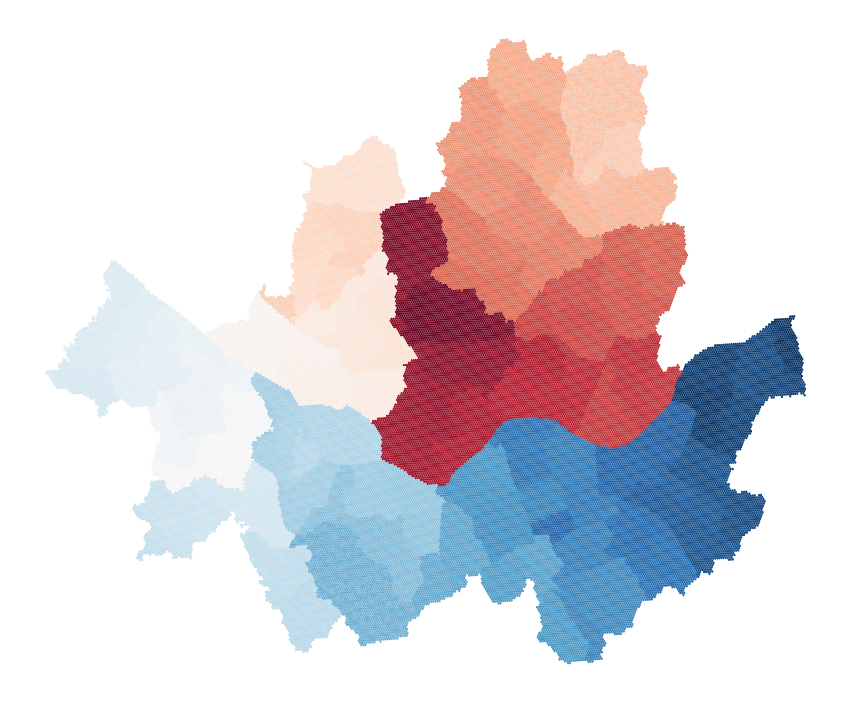

In [9]:
gdf_h3 = gdf_seoul.h3.polyfill_resample(10)
ax = gdf_h3.plot(figsize=(15, 15), cmap='RdBu')
ax.axis('off')

In [10]:
gdf_nakwon = gdf.loc[gdf['EMD_CD'].eq('42110103')]
gdf_nakwon = gdf.loc[gdf['EMD_CD'].between('42110101', '42110110')]
print(gdf_nakwon)

     EMD_CD           EMD_ENG_NM EMD_KOR_NM  \
0  42110101          Bongui-dong        봉의동   
1  42110102          Yoseon-dong        요선동   
2  42110103          Nagwon-dong        낙원동   
3  42110104   Jungangno 1(il)-ga      중앙로1가   
4  42110105    Jungangno 2(i)-ga      중앙로2가   
5  42110106  Jungangno 3(sam)-ga      중앙로3가   
6  42110107         Okcheon-dong        옥천동   
7  42110108          Joyang-dong        조양동   
8  42110109         Jungnim-dong        죽림동   
9  42110110           Ungyo-dong        운교동   

                                            geometry  
0  POLYGON ((127.73311 37.88673, 127.73298 37.885...  
1  POLYGON ((127.72584 37.88242, 127.72587 37.882...  
2  POLYGON ((127.72327 37.87704, 127.72249 37.876...  
3  POLYGON ((127.72991 37.88326, 127.72960 37.883...  
4  POLYGON ((127.72439 37.87755, 127.72430 37.877...  
5  POLYGON ((127.72434 37.87629, 127.72435 37.876...  
6  POLYGON ((127.73723 37.88679, 127.73711 37.886...  
7  POLYGON ((127.73269 37.88072, 127.73275

In [11]:
!pip install matplotlib

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


(127.716698282802, 127.73820901592559, 37.872940714778586, 37.88915557528277)

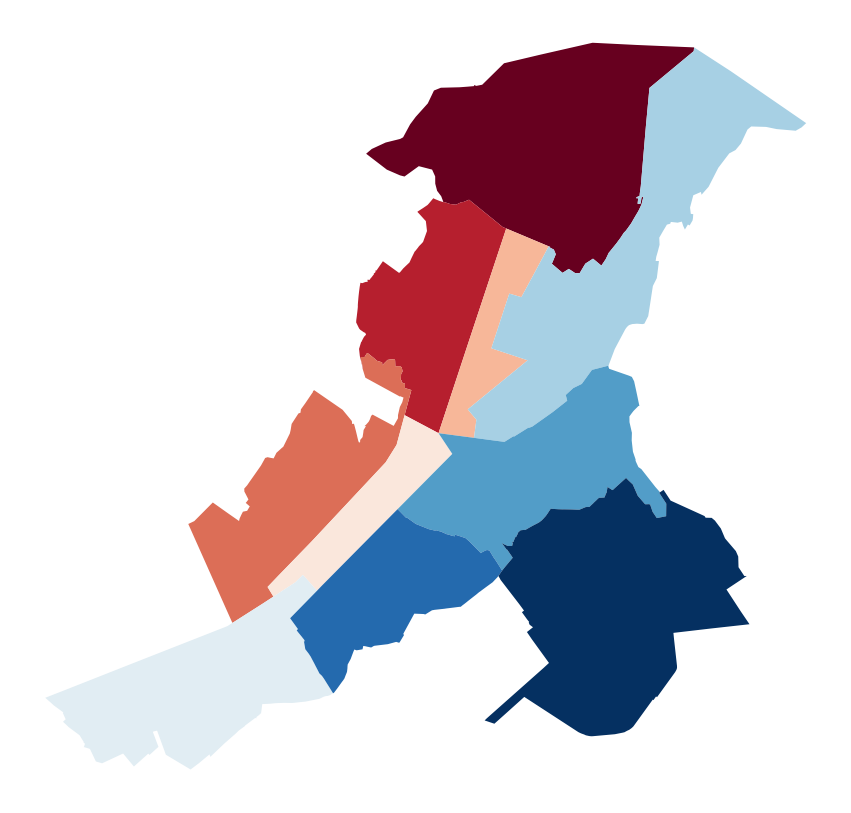

In [12]:
ax = gdf_nakwon.plot(figsize=(15, 15), cmap='RdBu')
ax.axis('off')

In [13]:
resolution =4

In [14]:
!pip install h3pandas

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [15]:
import h3pandas

gdf_nakwon = pd.DataFrame(gdf_nakwon)
gdf_h3 = gdf_nakwon.h3.polyfill(10)
print(gdf_h3)

     EMD_CD           EMD_ENG_NM EMD_KOR_NM  \
0  42110101          Bongui-dong        봉의동   
1  42110102          Yoseon-dong        요선동   
2  42110103          Nagwon-dong        낙원동   
3  42110104   Jungangno 1(il)-ga      중앙로1가   
4  42110105    Jungangno 2(i)-ga      중앙로2가   
5  42110106  Jungangno 3(sam)-ga      중앙로3가   
6  42110107         Okcheon-dong        옥천동   
7  42110108          Joyang-dong        조양동   
8  42110109         Jungnim-dong        죽림동   
9  42110110           Ungyo-dong        운교동   

                                            geometry  \
0  POLYGON ((127.73311 37.88673, 127.73298 37.885...   
1  POLYGON ((127.72584 37.88242, 127.72587 37.882...   
2  POLYGON ((127.72327 37.87704, 127.72249 37.876...   
3  POLYGON ((127.72991 37.88326, 127.72960 37.883...   
4  POLYGON ((127.72439 37.87755, 127.72430 37.877...   
5  POLYGON ((127.72434 37.87629, 127.72435 37.876...   
6  POLYGON ((127.73723 37.88679, 127.73711 37.886...   
7  POLYGON ((127.73269 37.88072, 1

In [16]:
gdf_h3 = gdf_nakwon.h3.polyfill(10, explode=True)
print(gdf_h3)

      EMD_CD   EMD_ENG_NM EMD_KOR_NM  \
0   42110101  Bongui-dong        봉의동   
0   42110101  Bongui-dong        봉의동   
0   42110101  Bongui-dong        봉의동   
0   42110101  Bongui-dong        봉의동   
0   42110101  Bongui-dong        봉의동   
..       ...          ...        ...   
9   42110110   Ungyo-dong        운교동   
9   42110110   Ungyo-dong        운교동   
9   42110110   Ungyo-dong        운교동   
9   42110110   Ungyo-dong        운교동   
9   42110110   Ungyo-dong        운교동   

                                             geometry      h3_polyfill  
0   POLYGON ((127.73311 37.88673, 127.73298 37.885...  8a30e1ac40effff  
0   POLYGON ((127.73311 37.88673, 127.73298 37.885...  8a30e1ac41affff  
0   POLYGON ((127.73311 37.88673, 127.73298 37.885...  8a30e1ac40f7fff  
0   POLYGON ((127.73311 37.88673, 127.73298 37.885...  8a30e1ac4017fff  
0   POLYGON ((127.73311 37.88673, 127.73298 37.885...  8a30e1ac4067fff  
..                                                ...              ...  
9   POLY

In [17]:
gdf_h3 = gdf_h3.set_index('h3_polyfill').h3.h3_to_geo_boundary()


(127.71749234053867, 127.73697634911086, 37.873108894291086, 37.88972707820665)

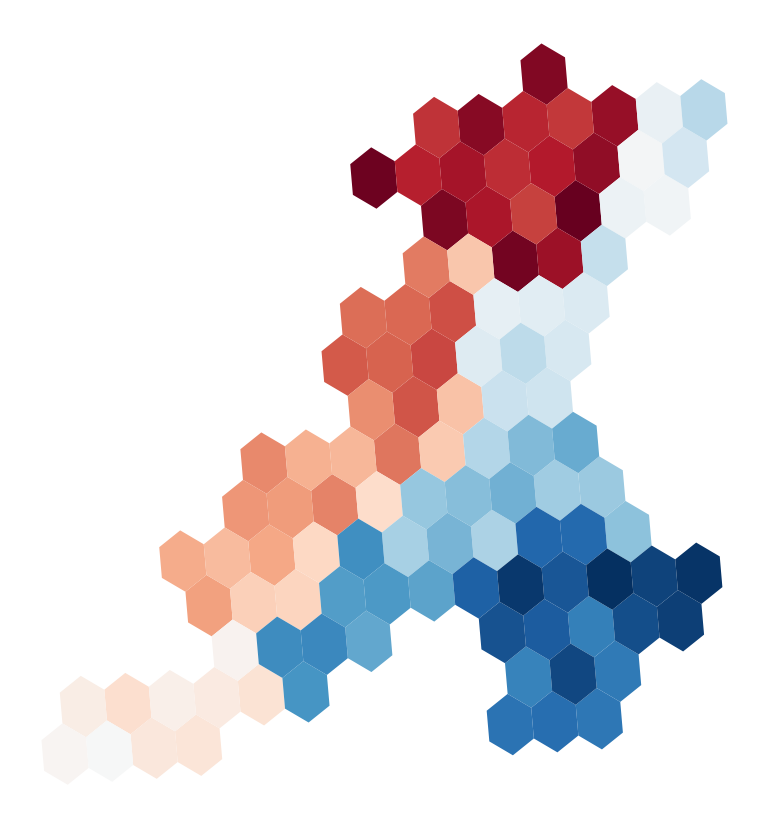

In [18]:
ax = gdf_h3.plot(figsize=(15, 15), cmap='RdBu')
ax.axis('off')